## KNN Algorithm with Iris dataset


The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### What is a K-Nearest Neighbor Algorithm (KNN)?
* KNN is one of the simplest classification algorithms and it is one of the most used learning algorithms.

* KNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (eg distance function).

* KNN is based on feature similarity.

**Real-Life Example**

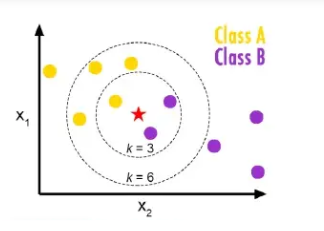

Class A belongs to the yellow family and Class B is belonged to the purple class according to the above figure. Then train dataset in KNN model which we discuss later but focus on just example here k=3 is three nearest neighbors a k=6 six nearest neighbors. so when we take k=3 then what happens and when k=6 then what happens. When k=3 then two belong to a purple class and one belongs to the yellow class majority vote of purple so here the purple class is considered similarly when k=6 then four belong to a yellow class and two belong to purple class so majority votes are yellow so consider the yellow class. So in this way KNN works.


The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:

1. Choose the number of k and a distance metric.
2. Find the k nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote.
4. K must be odd always.

### How k-Nearest Neighbor Algorithm Works?

The KNN algorithm works based on the similarity instances. The similarity is defined according to a distance metric between two data points.

A popular choice is a Euclidean distance very often.

According to the Euclidean distance formula, the distance between two points in the plane with coordinates (x, y) and (a, b) is given by:

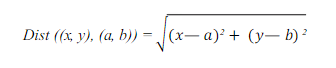

KNN runs through the whole dataset computing d between x and each training observation. We’ll call k points in the training dataset to x the set A. Note that k is usually odd to prevent a situation.

### Implementing KNN algorithm with Python over IRIS dataset

**Import packages**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load the data**

In [0]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [3]:
df = pd.read_csv(path, names = headernames)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data Preprocessing will be done with the help of following script lines.**

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

**Next, we will divide the data into train and test split. Following code will split the dataset into 75% training data and 25% of testing data:** 


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

**Next, data scaling will be done as follows:** 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Next, train the model with the help of KNeighborsClassifier class of sklearn as follows:**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

#this examines 3 neighbours for putting the new data into a class
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**At last we need to make prediction. It can be done with the help of following script:**

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

**Next, print the results as follows:** 

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

print("\n")

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  2 16]]


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.95        38
      macro avg       0.95      0.96      0.95        38
   weighted avg       0.95      0.95      0.95        38

Accuracy: 0.9473684210526315


In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  2 16]]


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        18

       accuracy                           0.95        38
      macro avg       0.95      0.96      0.95        38
   weighted avg       0.95      0.95      0.95        38



**Let’s check the accuracy for various values of n for K-Nearest neighbors.**

Text(0, 0.5, 'Accuracy')

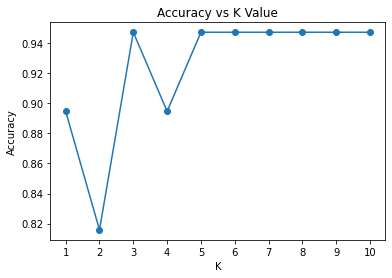

In [13]:
#for checking the model accuracy
from sklearn import metrics 

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a, marker="o")
plt.xticks(x)
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")

In [14]:
prediction

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

**Check the error rate vs K value**

Text(0, 0.5, 'Error Rate')

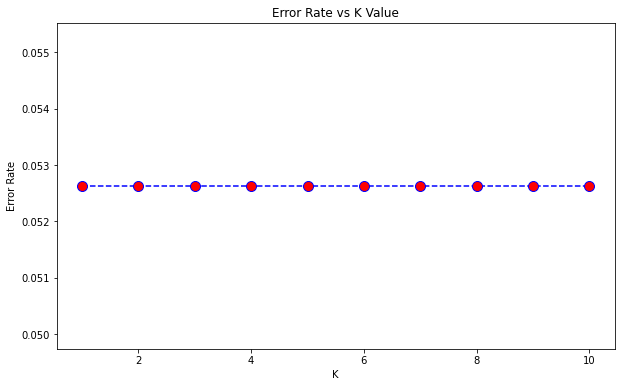

In [15]:
#for checking the model accuracy
from sklearn import metrics 

error_rate = []

for i in list(range(1,11)):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train,y_train)
  pred_i=model.predict(X_test)
  #print("Pred ", i, ", Y test: ", y_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [16]:
error_rate

[0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842]

## **Notes on Classification Report:** 
**Accuracy:**
- Accuracy refers to how close a measurement is to the true value.
- Accuracy Formula: **(TP+TN)/(TP+TN+FP+FN)**
- where: TP = True positive; FP = False positive; TN = True negative; FN = False negative.

**Error rate:**
- The inaccuracy of predicted output values is termed the error of the method.
- Error rate formula: **(False Positive + False Negative) / Total**
- Also we can say error rate = **1 - Accuracy**.

**Precision:** 
- What proportion of positive identifications was actually correct?
- Precision Formula: **True Positive / (True Positive + False Positive)**
- Precision in simple terms: What percent of positive prediction made were correct? 
- For example: 3 predictions are correct out of 4. In that case precision will be 3/4 is equal to .75. 

**Recall:**
- What proportion of actual positives was identified correctly?
- Recall in simple terms: What percent of actual positive values were correctly classified by your classifier? 
- Recall Formula: **True Positive / (True Positive + False Negative)**

**F Score:**
- F1 score is a weighted average score of the true positive (recall) and precision.
- F1 Score Formula: **2x(Recall x Precision) / (Recall + Precision)**

**Support:**
- The support is the number of occurence of the given class in your dataset.
- The support is the number of occurrences of each class in **y_true**.
